In [2]:
import pandas as pd
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
raw_data=pd.read_csv('climate_change_indicators.csv', index_col='ObjectId')
raw_data.head(3)

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
ObjectId,,,,,,,,,,,,,,,,,,,,,
1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.113,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.164,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 1 to 225
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              225 non-null    object 
 1   ISO2                 223 non-null    object 
 2   ISO3                 225 non-null    object 
 3   Indicator            225 non-null    object 
 4   Unit                 225 non-null    object 
 5   Source               225 non-null    object 
 6   CTS_Code             225 non-null    object 
 7   CTS_Name             225 non-null    object 
 8   CTS_Full_Descriptor  225 non-null    object 
 9   F1961                188 non-null    float64
 10  F1962                189 non-null    float64
 11  F1963                188 non-null    float64
 12  F1964                188 non-null    float64
 13  F1965                188 non-null    float64
 14  F1966                192 non-null    float64
 15  F1967                191 non-null    float64


In [6]:
df=raw_data[['Country','F1970','F1980','F1990','F2000','F2010','F2020']]
df.head(3)

,Country,F1970,F1980,F1990,F2000,F2010,F2020
ObjectId,,,,,,,
1,"Afghanistan, Islamic Rep. of",0.813,0.600,0.730,0.993,1.613,0.498
2,Albania,-0.106,-0.414,0.795,1.065,1.191,1.498
3,Algeria,0.116,0.232,1.266,0.820,2.265,1.926


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 1 to 225
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  225 non-null    object 
 1   F1970    189 non-null    float64
 2   F1980    191 non-null    float64
 3   F1990    189 non-null    float64
 4   F2000    209 non-null    float64
 5   F2010    215 non-null    float64
 6   F2020    212 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.1+ KB


In [8]:
df=pd.melt(df, id_vars=['Country'], value_vars=['F1970', 'F1980', 'F1990', 'F2000', 'F2010', 'F2020'])
df

,Country,variable,value
0,"Afghanistan, Islamic Rep. of",F1970,0.813
1,Albania,F1970,-0.106
2,Algeria,F1970,0.116
3,American Samoa,F1970,-0.047
4,"Andorra, Principality of",F1970,0.121
...,...,...,...
1345,Western Sahara,F2020,2.069
1346,World,F2020,1.711
1347,"Yemen, Rep. of",F2020,NaN
1348,Zambia,F2020,0.891


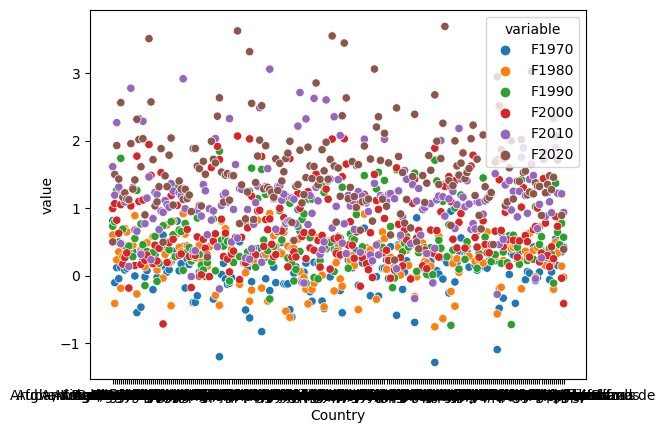

In [9]:
g=sns.scatterplot(
    data=df,
    x='Country',
    y='value',
    hue='variable'
)
